# Binary Prediction of Poisonous Mushrooms

## Table of Contents

- [**1. Introduction**](#introduction)

- [**2. Exploratory Data Analysis**](#eda)

    - 2.1. [Mushroom Type](#mushroomtype)
   
    - 2.2. [Numerical Features](#numerical)
   
    - 2.3. [Categorical Features](#categorical)
   
    - 2.4. [Missing Values](#missing)
 
- [**3. Data Preprocessing and Feature Engineering**](#data-preprocessing)

    - 3.1. [Update Categorical Values](#unused-cat)

    - 3.2. [Missing Data Handling](#missing-data)
    
    - 3.3. [Target Enconding](#target-encoding)
 
    - 3.4. [Pre-processing pipeline](#pipeline)

- [**4. Modeling**](#modeling)

    - 4.1. [Train and Test data split](#data-split)
 
    - 4.2. [Random Forest](#random-forest)

<a id="introduction"></a>
## 1. Introduction

I have started working on this project to expand my skill set by doing a comprehensive project. I came across the play groud series hosted by Kaggle and decided to work on it.

Find more details on the problem statement [here](https://www.kaggle.com/competitions/playground-series-s4e8).

First, I performed comprehensive exploratory data analysis to understand relationships among the most important variables and detect potential issues such as sknewness, outliers and missing values. Then, I handled these issues, cleansed the data and performed feature engineering. Lastly, I built machine learning models to predict mushroom type. By the time I write this notebook, my best model has Mean Absolute Error of 12293.919, ranking 95/15502, approximately top 0.6% in the Kaggle leaderboard.

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

#### Read train and test data

In [2]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

#### Describe data

In [3]:
print("Train data's size: ", train_data.shape)
print("Test data's size: ", test_data.shape)

Train data's size:  (3116945, 22)
Test data's size:  (2077964, 21)


In [4]:
numCols = list(train_data.select_dtypes(exclude='object').columns)

# remove "id" from the category columns
numCols.remove("id")
print(f"There are {len(numCols)} numerical features:\n", numCols)

There are 3 numerical features:
 ['cap-diameter', 'stem-height', 'stem-width']


In [5]:
catCols = list(train_data.select_dtypes(include='object').columns)

# remove predictor "class" from the category columns
catCols.remove("class")
print(f"There are {len(catCols)} categorical features:\n", catCols)

There are 17 categorical features:
 ['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color', 'habitat', 'season']


In [6]:
train_data.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [7]:
train_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    3116945 non-null  int64  
 1   class                 3116945 non-null  object 
 2   cap-diameter          3116941 non-null  float64
 3   cap-shape             3116905 non-null  object 
 4   cap-surface           2445922 non-null  object 
 5   cap-color             3116933 non-null  object 
 6   does-bruise-or-bleed  3116937 non-null  object 
 7   gill-attachment       2593009 non-null  object 
 8   gill-spacing          1858510 non-null  object 
 9   gill-color            3116888 non-null  object 
 10  stem-height           3116945 non-null  float64
 11  stem-width            3116945 non-null  float64
 12  stem-root             359922 non-null   object 
 13  stem-surface          1136084 non-null  object 
 14  stem-color            3116907 non-

In [8]:
train_data.describe()

,id,cap-diameter,stem-height,stem-width
count,3.116945e+06,3.116941e+06,3.116945e+06,3.116945e+06
mean,1.558472e+06,6.309848e+00,6.348333e+00,1.115379e+01
std,8.997847e+05,4.657931e+00,2.699755e+00,8.095477e+00
min,0.000000e+00,3.000000e-02,0.000000e+00,0.000000e+00
25%,7.792360e+05,3.320000e+00,4.670000e+00,4.970000e+00
50%,1.558472e+06,5.750000e+00,5.880000e+00,9.650000e+00
75%,2.337708e+06,8.240000e+00,7.410000e+00,1.563000e+01
max,3.116944e+06,8.067000e+01,8.872000e+01,1.029000e+02


<a name="eda"></a>
## 2. Exploratory Data Analysis

<a id="mushroomtype"></a>
### 2.1. Mushroom Type

<Axes: xlabel='class', ylabel='count'>

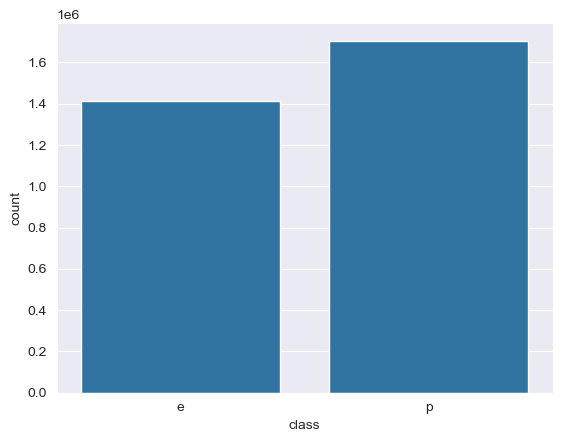

In [9]:
sns.countplot(train_data, x="class")

<a name="numerical"></a>
### 2.2. Numerical Features

<Axes: xlabel='class', ylabel='cap-diameter'>

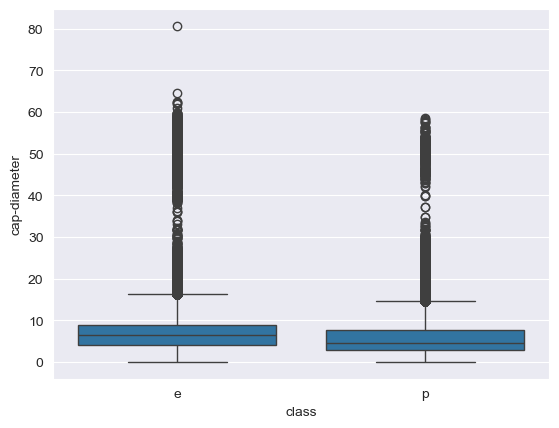

In [10]:
sns.boxplot(train_data, x="class", y="cap-diameter")

<Axes: xlabel='class', ylabel='stem-width'>

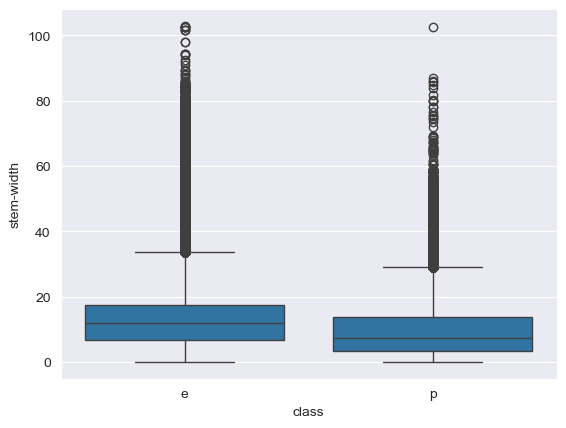

In [11]:
sns.boxplot(train_data, x="class", y="stem-width")

<Axes: xlabel='class', ylabel='stem-height'>

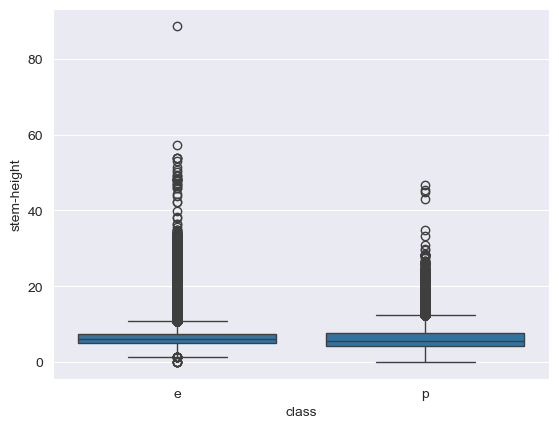

In [12]:
sns.boxplot(train_data, x="class", y="stem-height")

<a name="categorical"></a>
### 2.3 Categorical Features

In [13]:
def print_category_analysis(col_name: pd.Series):
    print(train_data[col_name].value_counts().to_string())
    print(set(test_data[col_name]) & set(train_data[col_name]))

In [14]:
print_category_analysis("cap-shape")

cap-shape
x            1436026
f             676238
s             365146
b             318646
o             108835
p             106967
c             104520
d                 65
e                 60
n                 41
t                 36
w                 36
g                 34
y                 33
r                 32
a                 30
u                 27
z                 22
l                 21
i                 14
k                 13
h                  6
m                  2
8                  2
3.55               2
7 x                2
4.97               2
3.25               1
11.12              1
3 x                1
4.3                1
7.41               1
6.21               1
8.29               1
7.21               1
54.78              1
2.82               1
20.25              1
3.52               1
3.04               1
6.53               1
2.63               1
3.91               1
6.44               1
8.3                1
7.6                1
1.66               1
17.

In [15]:
print_category_analysis("cap-surface")

cap-surface
t                       460777
s                       384970
y                       327826
h                       284460
g                       263729
d                       206832
k                       128875
e                       119712
i                       113440
w                       109840
l                        44859
n                           96
f                           75
p                           59
u                           49
a                           44
m                           42
o                           39
r                           35
x                           33
c                           31
b                           18
z                            8
season                       7
ring-type                    4
class                        2
has-ring                     2
does None                    2
does t                       2
spore-print-color            1
4.93                         1
does-bruise-or-bleed       

In [16]:
print_category_analysis("cap-color")

cap-color
n                       1359542
y                        386627
w                        379442
g                        210825
e                        197290
o                        178847
p                         91838
r                         78236
u                         73172
b                         61313
k                         59888
l                         39558
f                            53
d                            48
s                            39
a                            30
t                            26
h                            22
m                            14
x                            14
c                            14
i                            13
z                            10
ring-type                     6
season                        6
class                         5
11.13                         2
does-bruise-or-bleed          2
3.34                          2
2.7                           1
8.57                          

In [17]:
print_category_analysis("does-bruise-or-bleed")

does-bruise-or-bleed
f           2569743
t            547085
w                14
c                11
h                 9
a                 7
b                 7
x                 7
y                 7
k                 6
s                 6
e                 4
l                 4
p                 4
d                 4
g                 3
z                 3
o                 3
i                 2
n                 2
r                 1
has-ring          1
3.43              1
4.42              1
2.9               1
u                 1
{'y', 'l', 'g', 'e', 'b', 'a', 'i', 'f', 't', 'h', 'n', 's', 'x', 'k', 'c', 'w', 'o', nan, 'r', 'p'}


In [18]:
print_category_analysis("gill-attachment")

gill-attachment
a                       646034
d                       589236
x                       360878
e                       301858
s                       295439
p                       279110
f                       119953
c                           74
u                           56
w                           37
t                           36
k                           33
y                           28
i                           25
m                           22
g                           22
b                           21
n                           20
o                           18
h                           18
l                           16
r                           10
z                            5
season                       5
3.45                         2
2.54                         1
6.32                         1
13.15                        1
19.65                        1
2.41                         1
15.49                        1
4.01                   

In [19]:
print_category_analysis("gill-spacing")

gill-spacing
c              1331054
d               407932
f               119380
e                   24
a                   17
s                   16
b                   12
x                    8
t                    8
p                    7
k                    4
g                    4
l                    3
h                    3
r                    2
6.67                 2
y                    2
0                    2
3.81                 1
1.6                  1
n                    1
1.88                 1
does f               1
4.09                 1
1.36                 1
3.24                 1
5.55                 1
5.42                 1
5.7                  1
3.62                 1
6.4                  1
24.38                1
12.27                1
1                    1
cap-surface          1
w                    1
3.57                 1
i                    1
0.73                 1
4.04                 1
5.22                 1
3.92                 1
9.01                 

In [20]:
print_category_analysis("gill-color")

gill-color
w                       931538
n                       543386
y                       469464
p                       343626
g                       212164
o                       157119
k                       127970
f                       119694
r                        62799
e                        56047
b                        47247
u                        45399
l                           55
d                           54
t                           54
s                           46
x                           35
c                           31
a                           28
h                           24
m                           16
z                           16
i                            9
class                        7
season                       7
ring-type                    5
spacing                      4
spore-print-color            3
5                            3
has-ring                     3
habitat                      2
18.03                       

In [21]:
print_category_analysis("stem-root")

stem-root
b                    165801
s                    116946
r                     47803
c                     28592
f                       597
d                        24
y                        14
g                        12
w                        12
p                        12
k                        11
t                        10
l                        10
n                        10
x                         9
i                         8
u                         8
a                         7
e                         6
o                         5
m                         4
h                         4
z                         2
10.87                     1
13.03                     1
3.49                      1
spore-print-color         1
18.06                     1
20.0                      1
1.48                      1
3.23                      1
15.69                     1
16.88                     1
5.59                      1
2.77                      1
20.01     

In [22]:
print_category_analysis("stem-surface")

stem-surface
s                       327610
y                       255500
i                       224346
t                       147974
g                        78080
k                        73383
h                        28283
f                          512
w                           49
d                           48
e                           36
n                           34
x                           26
b                           23
c                           22
l                           20
p                           20
r                           20
u                           16
o                           15
a                           11
m                            7
season                       6
0.0                          3
z                            2
does-bruise-or-bleed         2
5.56                         2
10.48                        2
does s                       1
1.03                         1
7.45                         1
has h                     

In [23]:
print_category_analysis("stem-color")

stem-color
w                    1196637
n                    1003464
y                     373971
g                     132019
o                     111541
e                     103373
u                      67017
p                      54690
k                      33676
r                      22329
l                       9994
b                       7365
f                        573
s                         51
t                         40
a                         36
x                         20
i                         19
d                         16
h                         12
m                         11
c                          7
z                          6
ring-type                  3
class                      2
spore-print-color          2
is n                       1
6.31                       1
12.92                      1
3.98                       1
20.07                      1
7.7                        1
22.6                       1
6.09                       1
17.

In [24]:
print_category_analysis("veil-type")

veil-type
u          159373
w              11
a               9
f               8
e               8
b               5
c               5
y               4
k               4
g               4
n               3
s               3
r               2
d               2
p               2
h               2
i               2
l               1
is None         1
t               1
21.11           1
5.94            1
{'n', 'y', 'l', 'g', 'u', 'e', 'w', 'c', 'b', 's', nan, 'a', 'k', 'p'}


In [25]:
print_category_analysis("veil-color")

veil-color
w       279070
y        30473
n        30039
u        14026
k        13080
e         9169
g           30
p           23
r           14
o           13
s           11
a            7
t            7
d            6
i            6
h            5
c            4
f            4
l            4
b            3
z            1
8.25         1
2.49         1
3.32         1
{'y', 'l', 'g', 'e', 'b', 'a', 'i', 'f', 't', 'u', 'd', 'h', 'n', 's', 'k', 'c', 'w', 'o', nan, 'r', 'p'}


In [26]:
print_category_analysis("has-ring")

has-ring
f             2368820
t              747982
r                  16
h                  13
c                  11
l                  11
s                  11
p                  11
g                   8
z                   6
e                   6
x                   5
m                   4
y                   3
d                   3
k                   2
o                   2
n                   2
f has-ring          1
i                   1
10.3                1
w                   1
a                   1
{'y', 'm', 'l', 'g', 'e', 'a', 'i', 'f', 't', 'd', 'h', 's', 'z', 'x', 'k', 'c', 'w', 'o', nan, 'r', 'p'}


In [27]:
print_category_analysis("ring-type")

ring-type
f                       2477170
e                        120006
z                        113780
l                         73443
r                         67909
p                         67678
g                         63687
m                          3992
t                            98
d                            37
n                            34
x                            32
b                            29
y                            25
s                            18
k                            18
a                            16
h                            15
w                            14
u                            13
c                            11
o                             9
ring-type                     7
i                             4
does f                        3
season                        3
15                            1
14                            1
2.87                          1
sp                            1
class                         

In [28]:
print_category_analysis("spore-print-color")

spore-print-color
k             107310
p              68237
w              50173
n              22646
r               7975
u               7256
g               3492
y                 36
s                 21
c                 16
e                 14
f                 14
t                 13
a                 13
d                  9
l                  8
b                  5
m                  4
h                  3
o                  3
x                  2
i                  2
veil-color         2
10 None            1
9 None             1
2.49               1
class              1
2.62               1
season             1
9.55               1
6.36               1
4.58               1
{'y', 'l', 'g', 'e', 'b', 'veil-color', 'a', 'i', 'f', 't', 'u', 'd', 'h', 'n', 's', 'x', 'k', 'c', 'w', 'o', nan, 'r', 'p'}


In [29]:
print_category_analysis("habitat")

habitat
d                       2177573
g                        454908
l                        171892
m                        150969
h                        120137
w                         18530
p                         17180
u                          5264
e                            55
s                            52
n                            41
t                            40
r                            38
y                            34
a                            34
k                            31
c                            26
b                            18
o                            12
f                            11
i                             7
x                             5
z                             5
habitat                       5
class                         3
spore-print-color             3
ring-type                     2
18.35                         1
3.68                          1
2.44                          1
1.66                          1


In [30]:
print_category_analysis("season")

season
a    1543321
u    1153588
w     278189
s     141847
{'u', 's', 'w', 'a'}


<a name="missing"></a>
### 2.4. Missing Values

Most machine learning algorithms give an error when we train them on data with missing values. Therefore, it's important to identify them before deciding how to handle them (drop features or impute missing value).

In [31]:
missing_data = train_data.isnull().sum()
missing_data_per = missing_data / len(train_data) * 100
missing_data_per

id                       0.000000
class                    0.000000
cap-diameter             0.000128
cap-shape                0.001283
cap-surface             21.528227
cap-color                0.000385
does-bruise-or-bleed     0.000257
gill-attachment         16.809280
gill-spacing            40.373988
gill-color               0.001829
stem-height              0.000000
stem-width               0.000000
stem-root               88.452732
stem-surface            63.551362
stem-color               0.001219
veil-type               94.884350
veil-color              87.936970
has-ring                 0.000770
ring-type                4.134818
spore-print-color       91.425482
habitat                  0.001444
season                   0.000000
dtype: float64

<Axes: xlabel='None', ylabel='None'>

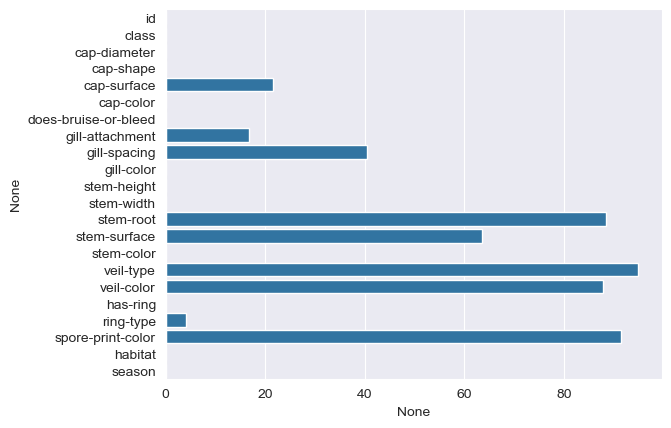

In [32]:
sns.barplot(y=missing_data_per.index,
            x=missing_data_per)

<a name="data-preprocessing"></a>
## 3. Data Preprocessing and Feature Engineering

<a name="unused-cat"></a>
## 3.1. Update Categorical Values

For kaggle problems, model is evaluated on test data. It would make more sense to update columns in train data to contain unique values from test data and set all other value to NaN.

In [33]:
# Update train data to contain values from test data
for col in catCols:
    if col != "class":
        vals = test_data[col].unique()
        train_data.loc[~train_data[col].isin(vals), col] = np.nan

<a name="missing-data"></a>
## 3.2. Missing Data Handling

In [34]:
from sklearn.impute import SimpleImputer

<a name="target-encoding"></a>
## 3.3. Target Encoding

In [35]:
from sklearn.preprocessing import TargetEncoder

<a name="pipeline"></a>
## 3.4. Pre-processing pipeline

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

cat_process_pipe = Pipeline([
    ("categorical_imputer", SimpleImputer(strategy="constant", fill_value="None")),
    ("target_encoder", TargetEncoder(target_type="binary", random_state=22)),
])
preprocessor = ColumnTransformer(
    transformers=[
        ("numerical_imputer", SimpleImputer(strategy="mean"), numCols),
        ("categorical_processing", cat_process_pipe, catCols)
    ]
)

<a name="modeling"></a>
# 4. Modeling

<a name="data-split"></a>
## 4.1. Train and Test data split

In [37]:
# Split the data into training and test sets
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=22)

for train_indices, test_indices in split.split(train_data, train_data["class"]):
    train = train_data.loc[train_indices]
    test = train_data.loc[test_indices]

y_train = train["class"]
y_test = test["class"]
X_train = train.drop(columns="class")
X_test = test.drop(columns="class")

<a name="random-forest"></a>
## 4.2. Random Forest

In [38]:
# Create a pipeline
from sklearn.ensemble import RandomForestClassifier

rf_pipeline = Pipeline([("preprocessor", preprocessor),
                        ("randomforest", RandomForestClassifier(warm_start=True, n_jobs=-1))])

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = [{"randomforest__n_estimators": [200],
               "randomforest__max_depth": [40]}]

grid_search = GridSearchCV(rf_pipeline, param_grid, cv=3, scoring="accuracy", return_train_score=True, n_jobs=-1, verbose=2)

In [40]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical_imputer',
                                                                         SimpleImputer(),
                                                                         ['cap-diameter',
                                                                          'stem-height',
                                                                          'stem-width']),
                                                                        ('categorical_processing',
                                                                         Pipeline(steps=[('categorical_imputer',
                                                                                          SimpleImputer(fill_value='None',
                                                                                                        strategy='constant')),
                                                                                         ('target_encoder',
                                                                                          TargetEncoder(random_state=22,
                                                                                                        target_ty...
                                                                          'gill-color',
                                                                          'stem-root',
                                                                          'stem-surface',
                                                                          'stem-color',
                                                                          'veil-type',
                                                                          'veil-color',
                                                                          'has-ring',
                                                                          'ring-type',
                                                                          'spore-print-color',
                                                                          'habitat',
                                                                          'season'])])),
                                       ('randomforest',
                                        RandomForestClassifier(n_jobs=-1,
                                                               warm_start=True))]),
             n_jobs=-1,
             param_grid=[{'randomforest__max_depth': [40],
                          'randomforest__n_estimators': [200]}],
             return_train_score=True, scoring='accuracy', verbose=2)

In [41]:
# Create a variable for the best model
best_rf = grid_search.best_estimator_

In [42]:
y_pred = best_rf.predict(X_test)

In [43]:
from sklearn.metrics import matthews_corrcoef

accuracy = matthews_corrcoef(y_test, y_pred)
accuracy

0.9839820364460731

In [44]:
grid_search.fit(train_data.drop(columns="class"), train_data["class"])

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numerical_imputer',
                                                                         SimpleImputer(),
                                                                         ['cap-diameter',
                                                                          'stem-height',
                                                                          'stem-width']),
                                                                        ('categorical_processing',
                                                                         Pipeline(steps=[('categorical_imputer',
                                                                                          SimpleImputer(fill_value='None',
                                                                                                        strategy='constant')),
                                                                                         ('target_encoder',
                                                                                          TargetEncoder(random_state=22,
                                                                                                        target_ty...
                                                                          'gill-color',
                                                                          'stem-root',
                                                                          'stem-surface',
                                                                          'stem-color',
                                                                          'veil-type',
                                                                          'veil-color',
                                                                          'has-ring',
                                                                          'ring-type',
                                                                          'spore-print-color',
                                                                          'habitat',
                                                                          'season'])])),
                                       ('randomforest',
                                        RandomForestClassifier(n_jobs=-1,
                                                               warm_start=True))]),
             n_jobs=-1,
             param_grid=[{'randomforest__max_depth': [40],
                          'randomforest__n_estimators': [200]}],
             return_train_score=True, scoring='accuracy', verbose=2)

In [45]:
# Create a variable for the best model
best_rf = grid_search.best_estimator_

In [47]:
# Process test data
predictions = best_rf.predict(test_data)

submission_df = pd.DataFrame(test_data["id"])
submission_df["class"] = predictions
submission_df.to_csv("data/mushroom_classfication_randomforest_20240816_01.csv", index=False)